# Integración y preparación de datos

## Visualización de datos

### 1. Importación de librerías y archivos

En las siguientes líneas se importarán las librerías necesarias, las cuales son **Pandas** para el manejo de datos, **matplotlib** para realizar gráficas.

In [1]:
# Importar las librerías necesarias según el análisis que se vaya a realizar
# Librería para manejo de datos convencional
import pandas as pd
#librería para creación de gráficos
import matplotlib.pyplot as plt

In [2]:
# cargar los datos en csv
# se cargan 1000 datos para que los gráficos sean más rápidos de procesar
data= pd.read_csv('productos_por_fecha.csv', sep=';', nrows=1000,encoding="latin-1")
# Visualizar los datos
data.head()

,producto_id,fecha_envio_limite,nombre_categoria_producto,longitud_nombre_producto,longitud_descripcion_producto,cantidad_fotos_producto,longitud_cm_producto,altura_cm_producto,ancho_cm_producto
0,PT66,19/09/2017 07:24,Tarjetas regalo,6,34,18,50,9,12
1,PB76,22/01/2018 11:30,Ropa de adultos,10,39,0,26,24,23
2,PJ55,09/12/2017 15:09,Mascotas,25,12,3,51,2,28
3,PO85,04/05/2018 04:15,Productos ecoamigables,33,25,25,19,26,28
4,PG31,17/09/2017 23:24,Salud,34,22,11,39,19,40


### 3. Análisis de la fuente de los datos

### 3.1. Registros y atributos
El número de registros y atributos nos dará una guía del correcto cargue de los datos, podemos utilizar la función shape para la revisión de este dato.

In [3]:
# dimensión de la fuente de datos
data.shape

(1000, 9)

In [4]:
# identificar los tipos de datos
data.dtypes

producto_id                      object
fecha_envio_limite               object
nombre_categoria_producto        object
longitud_nombre_producto          int64
longitud_descripcion_producto     int64
cantidad_fotos_producto           int64
longitud_cm_producto              int64
altura_cm_producto                int64
ancho_cm_producto                 int64
dtype: object

### 3. Diagramas

### 3.1. Diagrama de línea

El gráfico de línea muestra una relación lineal entre dos atributos:

* Usa el plano cartesiano para mostrar los datos y una línea para unirlos.
* Las variables son continuas.
* Ordena típicamente el eje de las X para mostrarlo.
* Puede mostrar tendencias.

Vamos a revisar las ventas totales por días en la organización durante el 2017.

In [6]:
data['fecha_envio_limite']=pd.to_datetime(data['fecha_envio_limite'])

#agrupar por fechas
#fechas de límites
fecha_inicio = "2017-01-01"
fecha_final = "2018-01-01"

#calcular entre dos fechas
despues_fecha_inicio = data['fecha_envio_limite'] >= fecha_inicio
antes_fecha_final = data['fecha_envio_limite'] <= fecha_final
entre_dos_fechas = despues_fecha_inicio & antes_fecha_final

#crear los datos para graficar
fecha_ventas=data

# obtener solamente los días
fecha_ventas['fecha_envio_limite']=fecha_ventas['fecha_envio_limite'].dt.date
fecha_ventas=fecha_ventas[entre_dos_fechas].groupby('fecha_envio_limite').count()['producto_id'].reset_index()
fecha_ventas.head()

,fecha_envio_limite,producto_id
0,2017-01-08,4
1,2017-01-09,4
2,2017-01-10,3
3,2017-01-11,2
4,2017-01-12,3


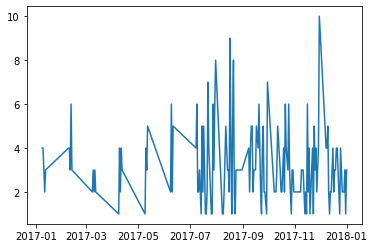

In [7]:
plt.plot(fecha_ventas['fecha_envio_limite'],fecha_ventas['producto_id'])
plt.show()

### 3.2. Diagrama de dispersión

El gráfico de línea muestra una relación entre dos atributos:

* Usa el plano cartesiano para mostrar los datos.
* Las variables son continúas.
* Muestra el grado de correlación entre dos variables. Positiva, negativa o neutra – lineal o no – fuerte o débil.

Vamos a revisar la relación entre el precio del producto y el precio del flete de envío:

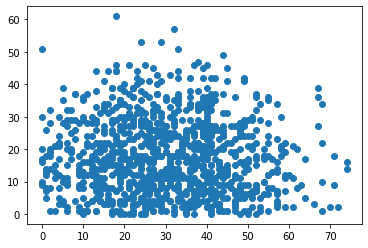

In [8]:
plt.scatter(data['longitud_cm_producto'],data['altura_cm_producto'])
plt.show()

### 3.3. Diagrama de barra

* Usa barras horizontales o verticales  para mostrar la comparación entre las categorías de una variable.
* Una de las variables es categórica y la otra continua.
* Permite mostrar grupos de categorías en barras continuas o apiladas.

Podemos revisar en cuál estado se tienen más ventas:

In [9]:
# resumir la información
ventas_categoria=data.groupby('nombre_categoria_producto').count()['producto_id'].reset_index()
ventas_categoria.head()

,nombre_categoria_producto,producto_id
0,Bebés,50
1,Carnicería,34
2,Celulares,51
3,Deportes,48
4,Dormitorio,41


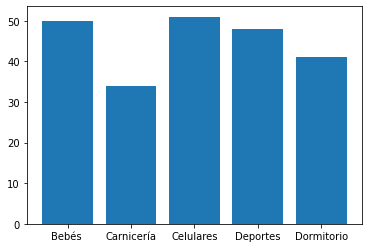

In [11]:
#Diagrama para un subconjunto de departamentos
plt.bar(ventas_categoria['nombre_categoria_producto'].head(5),ventas_categoria['producto_id'].head(5))
#plt.bar(muestra_ventas_categoria,ventas_categoria['producto_id'])
plt.show()

Vemos que hay un par de categorias con mayor cantidad de ventas.

### 3.4. Histograma
* Representa en barras, la frecuencia de valores de una variable.
* Las variables son continúas y la variable x es agrupada en intervalos continuos.
* A diferencia de los gráficos de barra en el histograma no hay espacios entre los valores de la variable del eje X.

Vamos a revisar la frecuencia de los precios de toda la tienda:

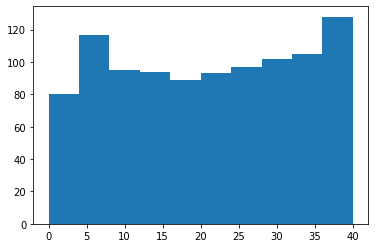

In [12]:
plt.hist(data['longitud_nombre_producto'])
plt.show()

### 3.5. Diagrama de cajas
* Usa una representación por cuartiles para ver el grado de dispersión de los datos. 
* Las variables son continuas.
* Se identifican los valores mínimo, máximo, mediana, primer, tercer cuartil y el rango intercuartil.

Vamos a revisar cómo son los precios del valor de flete:

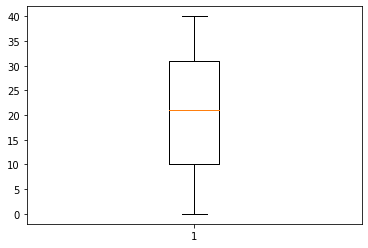

In [13]:
plt.boxplot(data['longitud_nombre_producto'])
plt.show()

### 4.6. Diagrama de torta
* Representa en circulo los valores de una variable.
* Las variables son categóricas y preferiblemente de pocos valores para observar con claridad la distribución de los datos.
* Muestra el número de valores por categoría o el porcentaje que representa.

Vamos a entender en qué categorías se distribuyen las ventas:

In [14]:
# Revisar las categorías vendidas
ventas_categoria=data.groupby('nombre_categoria_producto').count()['producto_id'].reset_index()
ventas_categoria

,nombre_categoria_producto,producto_id
0,Bebés,50
1,Carnicería,34
2,Celulares,51
3,Deportes,48
4,Dormitorio,41
5,Electrodomésticos,42
6,Ferretería,45
7,Frutas y verduras,57
8,Juguetes,65
9,Libros,49


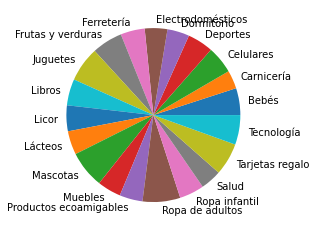

In [15]:
#Vemos los datos en una torta. Sin embargo, les contamos que este diagrama es poco utiizado en la actualidad.
plt.pie(ventas_categoria['producto_id'], labels=ventas_categoria['nombre_categoria_producto'])
plt.show()

Tenemos muchas categorías de producto y este gráfico no es apropiado para entenderlas. Debemos ajustar los datos para aprovechar este tipo de visualización.

In [16]:
# Revisar las principales categorías vendidas
ventas_categoria_principales=ventas_categoria.sort_values(by=['producto_id'], ascending=False).head(10)
ventas_categoria_principales

,nombre_categoria_producto,producto_id
15,Ropa de adultos,70
12,Mascotas,69
8,Juguetes,65
18,Tarjetas regalo,60
7,Frutas y verduras,57
19,Tecnología,55
2,Celulares,51
0,Bebés,50
9,Libros,49
3,Deportes,48


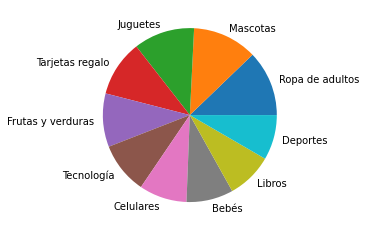

In [17]:
plt.pie(ventas_categoria_principales['producto_id'], labels=ventas_categoria_principales['nombre_categoria_producto'])
plt.show()

La mayor cantidad de productos se venden en la categoría 'Ropa de adultos'. Las demás categorías tienen una cantidad de ventas similar, por lo tanto en el gráfico se utiliza una cantidad de espacio similar.